In [1]:
import numpy as np
from fair.SSPs_mine import ssp245
import matplotlib.pyplot as plt

/data0/mdvorak/FAIR-master/fair/SSPs_mine/ssps.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SSP_370 = SSPs[SSP_370][~lowNTCF]


In [2]:
phase_out = (3,5,8,10,15,20,25,30)

abrupt_old = np.load('remote_runs_NOx/T_245_alloff_full.npy')[:,:,1]
abrupt_new = np.load('remote_runs_NOx/Phase-outs/T_245_abrupt.npy')
abrupt_F = np.load('remote_runs_NOx/Phase-outs/F_245_abrupt.npy')
abrupt_F = abrupt_F - abrupt_F[0,:,:]

phase = {}
forcing = {}

for year in phase_out:
    phase[year] = np.load('remote_runs_NOx/Phase-outs/T_245_%syrphase.npy' %(year))
    forcing[year] = np.load('remote_runs_NOx/Phase-outs/F_245_%syrphase.npy' %(year))
    forcing[year] = forcing[year] - forcing[year][0,:,:]

In [3]:
no_cessation = np.load('remote_runs_NOx/T_245.npy')
CO2 = np.load('remote_runs_NOx/Sensitivity_tests/Solar/T_CO2off_solar.npy')

In [4]:
T_245_CO2 = np.load('../FAIR-master/remote_runs_NOx/Sensitivity_tests/CO2/T_245_CO2_off.npy')*0.945428
#T_245_CO2 = np.load('../FAIR-master/remote_runs_landuse/Sensitivity_tests/CO2/T_245_CO2_off.npy')*1.022

In [5]:
phase[3].shape

(336, 6729)

In [6]:
SSP_245 = ssp245.Emissions_245.emissions[0:2100-1765,:]

In [7]:
start = 2008-1765
end = 2100-1765
end2 = 2020-1765

color_wheel = ('#d1d103',
'#e9b100',
'#f88f0d',
'#fd6c31',
'#f8474c',
'#e82265',
'#cd057c',
'#a5158f',
'#71299c')

In [8]:
import xarray as xr

ds = xr.open_dataset('../FAIR-master/HadCRUT_series_global_annual.nc')
Historical_obs = ds.sel(bnds=0).to_dataframe()

T_obs = np.array(Historical_obs['tas_mean'])
T_obs_mean = T_obs[1960-1850:1990-1850].mean()
T_obs_mean_2 = T_obs[0:1900-1850].mean()

T_obs_2 = T_obs + T_obs_mean - T_obs_mean_2

Historical_obs = ds.sel(bnds=0).to_dataframe()

Historical_obs['tas_mean']

time
1850-07-02 12:00:00   -0.417659
1851-07-02 12:00:00   -0.233350
1852-07-02 00:00:00   -0.229399
1853-07-02 12:00:00   -0.270354
1854-07-02 12:00:00   -0.291630
                         ...   
2017-07-02 12:00:00    0.845174
2018-07-02 12:00:00    0.762654
2019-07-02 12:00:00    0.891073
2020-07-02 00:00:00    0.922794
2021-07-02 12:00:00    0.701302
Name: tas_mean, Length: 172, dtype: float64

In [9]:
T_solar = np.load('remote_runs_NOx/Sensitivity_tests/Solar/T_alloff_solar.npy')

In [10]:
time = SSP_245[end2:end,0]
time2 = SSP_245[start:end2,0]

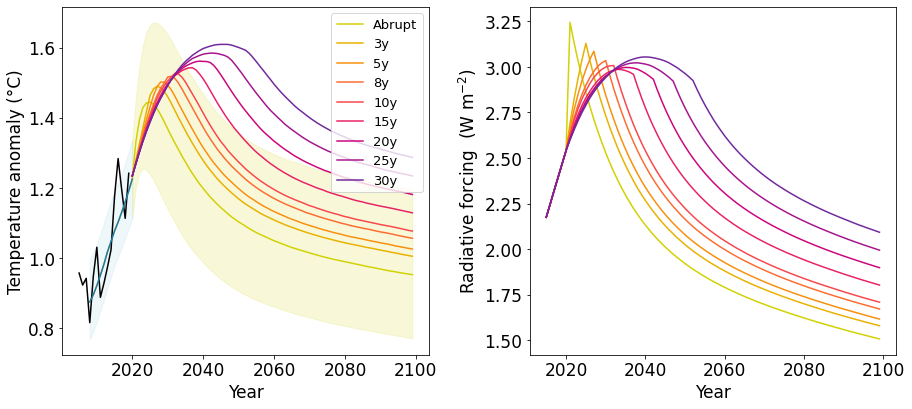

In [14]:

plt.rcParams.update({'font.size': 17})
plt.rcParams['figure.figsize'] = (13,6)

fig, (ax1,ax2) = plt.subplots(1,2)


#ax1.plot(time, np.percentile(no_cessation[start:end,:], 50, axis=1), label='SSP2-4.5, no cessation', color='#f69320')
ax1.plot(SSP_245[start:end,0], np.percentile(T_solar[start:end,:], 50, axis=1),label='Abrupt',color=color_wheel[0])
ax2.plot(SSP_245[2015-1765:end,0], np.percentile(np.sum(abrupt_F[2015-1765:end,:,:], axis=1), 50, axis=1),label='Abrupt',color=color_wheel[0])
ax1.fill_between(SSP_245[start:end2+1,0], np.percentile(T_solar[start:end2+1,:], 17, axis=1), np.percentile(T_solar[start:end2+1,:], 83, axis=1), color='lightblue', alpha=0.2)
ax1.fill_between(SSP_245[end2:end,0], np.percentile(T_solar[end2:end,:], 17, axis=1), np.percentile(T_solar[end2:end,:], 83, axis=1), color=color_wheel[0], alpha=0.15)


ax1.plot(SSP_245[2005-1765:2020-1765,0], T_obs_2[2005-1850:2020-1850],color='black')
ax1.plot(SSP_245[start:end2+1,0], np.percentile(T_solar[start:end2+1,:], 50, axis=1))

for year,color in zip(phase_out, color_wheel[1:]):
    ax1.plot(time, np.percentile(phase[year][end2:end,:], 50, axis=1), label=str(year)+'y', color=color)
    ax2.plot(SSP_245[2015-1765:end,0], np.percentile(np.sum(forcing[year][2015-1765:end,:,:], axis=1), 50, axis=1), label=str(year)+'y', color=color)

ax1.legend(loc='upper right', fontsize=13)
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature anomaly (°C)', labelpad=3)
ax2.set_xlabel('Year')
ax2.set_ylabel('Radiative forcing  (W m$^{-2}$)', labelpad=3)

# ax1.text(-0.15, 1.04, 'a', transform=ax1.transAxes, 
#             size=20, weight='bold')
# ax2.text(-0.15, 1.04, 'b', transform=ax2.transAxes, 
#             size=20, weight='bold')

#ax1.set_ylim(0.8, 1.7)
#ax1.axhline(y=1.5, linestyle='dotted',color='gray')
plt.tight_layout();
plt.savefig('remote_runs_NOx/Figures/Phase_outs.pdf', bbox_inches='tight');

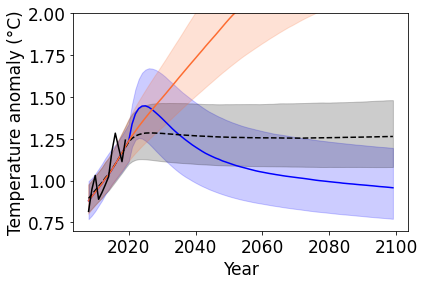

In [45]:
fig, ax1 = plt.subplots(1,1, figsize=(6,4))

plt.rcParams.update({'font.size': 17})

ax1.plot(SSP_245[start:end,0], np.percentile(abrupt_old[start:end,:], 50, axis=1),label='Abrupt', color='blue')
ax1.fill_between(SSP_245[start:end,0], np.percentile(T_solar[start:end,:], 17, axis=1), np.percentile(T_solar[start:end,:], 83, axis=1), color='blue',alpha=0.2)
#ax1.fill_between(SSP_245[end2:end,0], np.percentile(T_solar[end2:end,:], 17, axis=1), np.percentile(T_solar[end2:end,:], 83, axis=1), alpha=0.15)
ax1.plot(SSP_245[start:end,0], np.percentile(T_245_CO2[start:end,:], 50, axis=1),label='Abrupt', color='black', linestyle='dashed')
ax1.fill_between(SSP_245[start:end,0], np.percentile(T_245_CO2[start:end,:], 17, axis=1), np.percentile(T_245_CO2[start:end,:], 83, axis=1), color='black',alpha=0.2)

ax1.plot(SSP_245[start:end,0], np.percentile(no_cessation[start:end,:], 50, axis=1),label='Abrupt', color=color_wheel[3])
ax1.fill_between(SSP_245[start:end,0], np.percentile(no_cessation[start:end,:], 17, axis=1), np.percentile(no_cessation[start:end,:], 83, axis=1), color=color_wheel[3],alpha=0.2)

ax1.plot(time2, T_obs_2[2008-1850:2020-1850],color='black')


ax1.set_ylim(0.7,2.0)
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature anomaly (°C)', labelpad=3)
plt.savefig('remote_runs_NOx/Sensitivity_tests/Solar/shut-off_fig_step3.png', bbox_inches='tight');

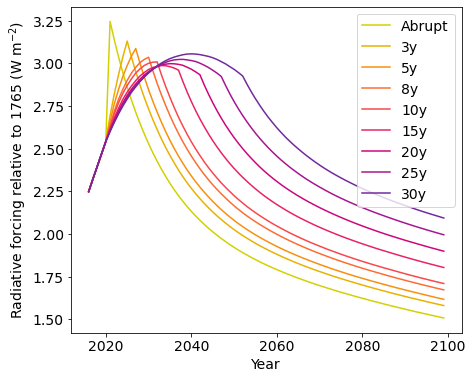

In [44]:
plt.plot(time, np.percentile(np.sum(abrupt_F[start:end,:,:], axis=1), 50, axis=1),label='Abrupt',color=color_wheel[0])
#plt.plot(time, np.percentile(abrupt_old[start:end,:], 50, axis=1))

for year,color in zip(phase_out, color_wheel[1:]):
    plt.plot(time, np.percentile(np.sum(forcing[year][start:end,:,:], axis=1), 50, axis=1), label=str(year)+'y', color=color)
    
plt.legend()
plt.xlabel('Year')
plt.ylabel('Radiative forcing relative to 1765 (W m$^{-2}$)')
plt.savefig('remote_runs_NOx/Phase-outs/Figure_forcing.png');